In [1]:
import os

import torch
import easyocr
import cv2
import numpy as np
from matplotlib import pyplot as plt
from pathlib import Path
import shutil

import random

cwd = os.getcwd()

if torch.cuda.is_available():
    reader = easyocr.Reader(['en'], gpu=True)
    print(f"GPU in use: {torch.cuda.get_device_name(0)}")

else:
    reader = easyocr.Reader(['en'], gpu=False)
    print("using CPU, CUDA not available")

GPU in use: NVIDIA GeForce RTX 4060 Laptop GPU


final length: 7


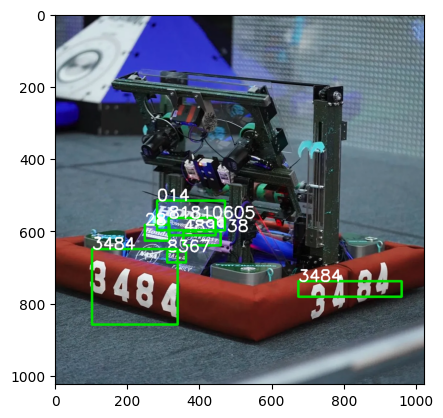

In [8]:
#Set image here
IMAGE_PATH = (f"{cwd}\image_library\\3484_3.webp")
result = reader.readtext(IMAGE_PATH)

#Initiate list for result collection
bottom_right_list = list()
top_left_list = list()
index_list = list()
answer_list = list()

img = cv2.imread(IMAGE_PATH)

#Print results
if not result:
    print("Empty Results List")
else:
    for index, item in enumerate(result):
        if result[index][1].isdigit():
            bottom_right_list.append(tuple(result[index][0][2]))
            top_left_list.append(tuple(result[index][0][0]))
            answer_list.append(result[index][1])
        else:
            print(f"discarding: {result[index][1]}")
        
        #Display Settings
        font = cv2.FONT_HERSHEY_SIMPLEX
        
        #Add labels
        for idx, answer in enumerate(answer_list):
            img = cv2.rectangle(img, tuple(map(int, top_left_list[idx])), tuple(map(int, bottom_right_list[idx])), (0, 225, 0), 5)
            img = cv2.putText(img, answer_list[idx], tuple(map(int, top_left_list[idx])), font, 1.5, (255, 255, 255), 3)

#Display image
print(f"final length: {len(answer_list)}")
plt.imshow(img)
plt.show()

In [6]:
answer_list

['3484']

In [22]:
#ROSTER GENERATOR & FOLDER RESETTER

#Number of competitors
comp_num = 35
comp_roster = list()
file_list = os.listdir(f"{cwd}\image_library\\")

for x in range(comp_num):
    valid_team = False
    while not valid_team:
        team = random.randint(1, 9785)
        if team in comp_roster:
            valid_team = False
        else:
            for file in file_list:
                if file.startswith(str(team) + "_"):
                    valid_team = True
                    comp_roster.append(team)
                    break
                else:
                    valid_team = False

print("Generated new roster!")

# Clear files in unsorted folder
unsorted_files = os.listdir(f"{cwd}\\unsorted_demo\\")
if len(unsorted_files) > 0:
    for filename in unsorted_files:
        file_path = os.path.join(f"{cwd}\\unsorted_demo\\", filename)
        try:
            if os.path.isfile(file_path) or os.path.islink(file_path):
                os.unlink(file_path)
            elif os.path.isdir(file_path):
                shutil.rmtree(file_path)
        except Exception as e:
            print('Failed to delete %s. Reason: %s' % (file_path, e))
    print("Successfully cleared folder 'unsorted files'")
else:
    print("No files removed for unsorted files: Length = 0")

# Clear files from sorted folder
sorted_files = os.listdir(f"{cwd}\\sorted_teams\\")
if len(sorted_files) > 0:
    for filename in sorted_files:
        file_path = os.path.join(f"{cwd}\\sorted_teams\\", filename)
        try:
            if os.path.isfile(file_path) or os.path.islink(file_path):
                os.unlink(file_path)
            elif os.path.isdir(file_path):
                shutil.rmtree(file_path)
        except Exception as e:
            print('Failed to delete %s. Reason: %s' % (file_path, e))
    print("Successfully cleared folder 'sorted files'")
else:
    print("No files removed for sorted folder: Length = 0")

# Clear files from unidentifiable folder
unidentifiable_files = os.listdir(f"{cwd}\\unidentifiable_demo\\")
if len(unidentifiable_files) > 0:
    for filename in unidentifiable_files:
        file_path = os.path.join(f"{cwd}\\unidentifiable_demo\\", filename)
        try:
            if os.path.isfile(file_path) or os.path.islink(file_path):
                os.unlink(file_path)
            elif os.path.isdir(file_path):
                shutil.rmtree(file_path)
        except Exception as e:
            print('Failed to delete %s. Reason: %s' % (file_path, e))
    print("Successfully cleared folder 'unidentifiable'")
else:
    print("No files removed for unidentifiable folder: Length = 0")

for team in comp_roster:
    Path(f"{cwd}/sorted_teams/{str(team)}").mkdir(parents=True, exist_ok=True)
    print(f"Created folder for {team}")


# MANAGES SETTING UP AND MOVING IMAGES
selected_file_list = list()

for team in comp_roster:
    for file in file_list:
        if file.startswith(f"{str(team)}"):
            selected_file_list.append(file)

for file in selected_file_list:
    shutil.copy(f"{cwd}\image_library\\{file}", f"{cwd}\\unsorted_demo\\")

Generated new roster!
No files removed for unsorted files: Length = 0
No files removed for sorted folder: Length = 0
Successfully cleared folder 'unidentifiable'
Created folder for 7895
Created folder for 8764
Created folder for 166
Created folder for 6150
Created folder for 5144
Created folder for 85
Created folder for 4392
Created folder for 7166
Created folder for 1626
Created folder for 6036
Created folder for 4330
Created folder for 3489
Created folder for 8799
Created folder for 1506
Created folder for 4501
Created folder for 746
Created folder for 5429
Created folder for 5190
Created folder for 2337
Created folder for 2687
Created folder for 955
Created folder for 3593
Created folder for 5886
Created folder for 3940
Created folder for 3038
Created folder for 8517
Created folder for 6357
Created folder for 1625
Created folder for 2225
Created folder for 5889
Created folder for 6832
Created folder for 287
Created folder for 8532
Created folder for 229
Created folder for 5965


In [23]:
unsorted_files_list = os.listdir(f"{cwd}\\unsorted_demo\\")
for file in unsorted_files_list:

    WORKING_IMAGE_PATH = (f"{cwd}\\unsorted_demo\\{file}")
    result = reader.readtext(WORKING_IMAGE_PATH)
    
    #Initiate list for result collection
    answer_list = list()
    
    img = cv2.imread(WORKING_IMAGE_PATH)
    
    #Print results
    if not result:
        print("Empty Results List")
        shutil.copy(f"{cwd}\\unsorted_demo\\{file}", f"{cwd}\\unidentifiable_demo\\{file}")
    else:
        sorted_status = False
        for index, item in enumerate(result):
            if result[index][1].isdigit() and int(result[index][1]) in comp_roster:
                answer_list.append(result[index][1])
                shutil.copy(f"{cwd}\\unsorted_demo\\{file}", f"{cwd}\\sorted_teams\\{int(result[index][1])}\\{file}")
                sorted_status = True
            else:
                print(f"discarding: {result[index][1]}")

        if not sorted_status:
            shutil.copy(f"{cwd}\\unsorted_demo\\{file}", f"{cwd}\\unidentifiable_demo\\{file}")

print("Finished sorting!")

# Clear files in unsorted folder
unsorted_files = os.listdir(f"{cwd}\\unsorted_demo\\")
if len(unsorted_files) > 0:
    for filename in unsorted_files:
        file_path = os.path.join(f"{cwd}\\unsorted_demo\\", filename)
        try:
            if os.path.isfile(file_path) or os.path.islink(file_path):
                os.unlink(file_path)
            elif os.path.isdir(file_path):
                shutil.rmtree(file_path)
        except Exception as e:
            print('Failed to delete %s. Reason: %s' % (file_path, e))
    print("Successfully cleared folder 'unsorted files'")
else:
    print("No files removed for unsorted files: Length = 0")

discarding: Cm
discarding: Jmmemdrkse
discarding: 107
discarding: FIRST
discarding: FIRST
discarding: 19
discarding: 141
discarding: 2C19
discarding: FIRST
discarding: V7
discarding: QURT}
discarding: 2c19 F
discarding: (6l&7
discarding: blal
discarding: RGEDS
discarding: FIRST
discarding: IIRS
discarding: 6i5
discarding: nme
discarding: 1
discarding: 9
discarding: 4906
discarding: 5cs
discarding: 07
discarding: FIRST
discarding: 4s
discarding: VNNER
discarding: 493
discarding: 0
discarding: FRC
discarding: Tol
discarding: HS
discarding: RobouSS
discarding: Conpendi
discarding: WINNB
discarding: :
discarding: HHAF
discarding: HtH
discarding: Aichard and lane Katiman
discarding: Faundanon
discarding: Berkshire Taconic Foundation
discarding: Fabtech
discarding: HcsO
discarding: Meagan :
discarding: Dom Brino
discarding: #udion @iue Kawk Nation
discarding: Schoal Progrm
discarding: Stephanle Forsyth
discarding: Redson
discarding: ~Pulver Glass
discarding: Hudson Hadh Schodl
discarding: Ga

In [28]:
(len(unsorted_files)-len(os.listdir(f"{cwd}\\unidentifiable_demo\\")))/len(unsorted_files)

0.56